In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('car.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data = data.drop(['Car_Name'], axis=1)

In [5]:
data['current_year'] = 2020
data['no_year'] = data['current_year'] - data['Year']

In [6]:
data = data.drop(['Year','current_year'],axis = 1)

In [7]:
data = pd.get_dummies(data,drop_first=True)

In [8]:
data = data[['Selling_Price','Present_Price','Kms_Driven','no_year','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [9]:
data

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,0,1,0,1
1,4.75,9.54,43000,7,0,1,0,0,1
2,7.25,9.85,6900,3,0,0,1,0,1
3,2.85,4.15,5200,9,0,0,1,0,1
4,4.60,6.87,42450,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,4,0,1,0,0,1
297,4.00,5.90,60000,5,0,0,1,0,1
298,3.35,11.00,87934,11,0,0,1,0,1
299,11.50,12.50,9000,3,0,1,0,0,1


In [10]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.089216,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,0.182104,-0.064315,0.059959,0.039896,-0.000394
Owner,-0.088344,0.008057,0.089216,0.182104,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [11]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [13]:
model.feature_importances_

array([3.95452226e-01, 4.18796578e-02, 7.59099656e-02, 3.69526611e-04,
       2.21591422e-01, 9.94971316e-03, 1.19737245e-01, 1.35110243e-01])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [15]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

hyp = RandomizedSearchCV(estimator = model,param_distributions=grid,
    n_iter=10,
    scoring= 'neg_mean_squared_error',
    cv=5,verbose = 2, random_state = 42,n_jobs = 1)

In [19]:
hyp.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
y_pred = hyp.predict(x_test)

In [23]:
y_pred

array([ 7.03124857,  0.51381478,  4.96801527,  8.41437666, 12.52522987,
        5.25185645,  3.35333259,  0.42998477,  3.87592716,  5.09494244,
        2.83436985,  0.65485407,  5.1028215 ,  7.24883115,  7.43476784,
       12.66011152,  6.96235867,  4.17152195,  0.48378486,  1.30438985,
        3.26740439,  5.20260437,  5.40296017, 10.40299705,  0.23504391,
        0.68763525,  0.33591785,  0.71121066,  0.50450637,  4.90400721,
        2.85287055,  5.87355243,  0.51989355,  7.13587995,  3.34868472,
        1.15031281,  5.73970285,  5.46683767,  0.25150811,  7.66933046,
        7.5978013 , 21.9540229 ,  5.07840731,  4.55497014,  5.61008423,
       10.31708075,  0.25017832,  0.7728509 ,  5.40987128,  6.75513381,
        6.72573589,  2.96562304,  5.34856926, 21.93815028,  1.15031281,
        1.14941295,  0.41400609,  2.7503663 ,  3.62092698,  2.50441723,
        4.61502319])

In [24]:
import seaborn as sns

C:\ProgramData\jpyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

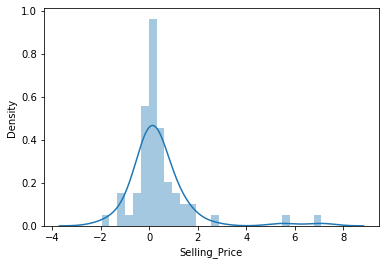

In [25]:
sns.distplot(y_test-y_pred)

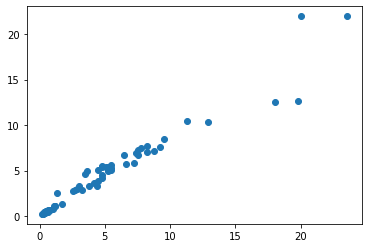

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [27]:
import pickle
file = open('file.pkl','wb')

pickle.dump(hyp,file)